<a href="https://colab.research.google.com/github/poojan-dalal/Colab_public/blob/master/Copy_of_fruit_clsfir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files


In [0]:
files.upload()

In [0]:
!mkdir ~/.kaggle


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)  280MB  2020-03-14 01:22:38           6751  
unanimad/dataisbeautiful                                    Reddit - Data is Beautiful                           10MB  2020-03-13 16:34:07            118  
rubenssjr/brasilian-houses-to-rent                          brazilian_houses_to_rent                            117KB  2020-03-15 01:12:22            120  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     364KB  2020-03-17 17:00:17          53412  
kimjihoo/coronavirusdataset                                 Coro

In [7]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [00:43<00:00, 91.2MB/s]
100% 3.58G/3.58G [00:43<00:00, 88.1MB/s]


In [0]:
!mkdir train

In [9]:
!unzip fruits-fresh-and-rotten-for-classification.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: train/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.46 PM.png  
  inflating: train/dat

In [0]:
!rm -rf train/dataset/dataset

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('train/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
train/dataset/train/freshoranges/rotated_by_30_Screen Shot 2018-06-13 at 12.02.53 AM.png
train/dataset/train/freshoranges/saltandpepper_Screen Shot 2018-06-13 at 12.06.15 AM.png
train/dataset/train/freshoranges/rotated_by_75_Screen Shot 2018-06-12 at 11.51.08 PM.png
train/dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.52.12 PM.png
train/dataset/train/freshoranges/Screen Shot 2018-06-12 at 11.54.20 PM.png
train/dataset/train/freshoranges/rotated_by_75_Screen Shot 2018-06-13 at 12.03.21 AM.png
train/dataset/train/freshoranges/rotated_by_60_Screen Shot 2018-06-13 at 12.18.23 AM.png
train/dataset/train/freshoranges/vertical_flip_Screen Shot 2018-06-13 at 12.00.17 AM.png
train/dataset/train/freshoranges/saltandpepper_Screen Shot 2018-06-12 at 11.51.13 PM.png
train/dataset/train/freshoranges/translation_Screen Shot 2018-06-12 at 11.55.05 PM.png
train/dataset/train/freshoranges/rotated_by_30_Screen Shot 2018-06-13 at 12

In [3]:
import tensorflow as tf
import keras
import torch
import torchvision
import cv2
import numpy as np

Using TensorFlow backend.


In [4]:
import glob

train_fresh_apple_dir = 'train/dataset/train/freshapples'
train_rotten_apple_dir = 'train/dataset/train/rottenapples'
train_fresh_banana_dir = 'train/dataset/train/freshbanana'
train_rotten_banana_dir = 'train/dataset/train/rottenbanana'
train_fresh_orange_dir = 'train/dataset/train/freshoranges'
train_rotten_orange_dir = 'train/dataset/train/rottenoranges'

test_fresh_apple_dir = 'train/dataset/test/freshapples'
test_rotten_apple_dir = 'train/dataset/test/rottenapples'
test_fresh_banana_dir = 'train/dataset/test/freshbanana'
test_rotten_banana_dir = 'train/dataset/test/rottenbanana'
test_fresh_orange_dir = 'train/dataset/test/freshoranges'
test_rotten_orange_dir = 'train/dataset/test/rottenoranges'

train_fresh_apple_files = glob.glob(train_fresh_apple_dir + '/*')
train_rotten_apple_files = glob.glob(train_rotten_apple_dir + '/*')
train_fresh_banana_files = glob.glob(train_fresh_banana_dir + '/*')
train_rotten_banana_files = glob.glob(train_rotten_banana_dir + '/*')
train_fresh_orange_files = glob.glob(train_fresh_orange_dir + '/*')
train_rotten_orange_files = glob.glob(train_rotten_orange_dir + '/*')

print('train samples of fresh apple:', len(train_fresh_apple_files))
print('train samples of rotten apple:', len(train_rotten_apple_files))
print('train samples of apple:', len(train_fresh_apple_files) + len(train_rotten_apple_files))
print('train samples of fresh banana:', len(train_fresh_banana_files))
print('train samples of rotten banana:', len(train_rotten_banana_files))
print('train samples of banana:', len(train_fresh_banana_files) + len(train_rotten_banana_files))
print('train samples of fresh orange:', len(train_fresh_orange_files))
print('train samples of rotten orange:', len(train_rotten_orange_files))
print('train samples of orange:', len(train_fresh_orange_files) + len(train_rotten_orange_files))
print('total train samples:', 
      len(train_fresh_apple_files) + 
      len(train_rotten_apple_files) + 
      len(train_fresh_banana_files) + 
      len(train_rotten_banana_files) +
      len(train_fresh_orange_files) + 
      len(train_rotten_orange_files))

test_fresh_apple_files = glob.glob(test_fresh_apple_dir + '/*')
test_rotten_apple_files = glob.glob(test_rotten_apple_dir + '/*')
test_fresh_banana_files = glob.glob(test_fresh_banana_dir + '/*')
test_rotten_banana_files = glob.glob(test_rotten_banana_dir + '/*')
test_fresh_orange_files = glob.glob(test_fresh_orange_dir + '/*')
test_rotten_orange_files = glob.glob(test_rotten_orange_dir + '/*')

print('test samples of fresh apple:', len(test_fresh_apple_files))
print('test samples of rotten apple:', len(test_rotten_apple_files))
print('test samples of apple:', len(test_fresh_apple_files) + len(test_rotten_apple_files))
print('test samples of fresh banana:', len(test_fresh_banana_files))
print('test samples of rotten banana:', len(test_rotten_banana_files))
print('test samples of banana:', len(test_fresh_banana_files) + len(test_rotten_banana_files))
print('test samples of fresh orange:', len(test_fresh_orange_files))
print('test samples of rotten orange:', len(test_rotten_orange_files))
print('test samples of orange:', len(test_fresh_orange_files) + len(test_rotten_orange_files))
print('total test samples:', 
      len(test_fresh_apple_files) + 
      len(test_rotten_apple_files) + 
      len(test_fresh_banana_files) + 
      len(test_rotten_banana_files) +
      len(test_fresh_orange_files) + 
      len(test_rotten_orange_files))

train samples of fresh apple: 1693
train samples of rotten apple: 2342
train samples of apple: 4035
train samples of fresh banana: 1581
train samples of rotten banana: 2224
train samples of banana: 3805
train samples of fresh orange: 1466
train samples of rotten orange: 1595
train samples of orange: 3061
total train samples: 10901
test samples of fresh apple: 395
test samples of rotten apple: 601
test samples of apple: 996
test samples of fresh banana: 381
test samples of rotten banana: 530
test samples of banana: 911
test samples of fresh orange: 388
test samples of rotten orange: 403
test samples of orange: 791
total test samples: 2698


In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
import pandas as pd


input_shape = (224, 224, 3)
mobilenet_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
#output = mobilenet.layers[-1].output
#output = Flatten()(output)
#mobilenet_model = Model(mobilenet.input, output)

mobilenet_model.trainable = True
#fine_tune_at = 100
# Freeze all the layers before the `fine_tune_at` layer
#for layer in mobilenet_model.layers[:fine_tune_at]:
#    layer.trainable =  False

mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [7]:
import os
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.3, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255)

dataset_path = 'train/dataset'

train_set_path = os.path.join(dataset_path, 'train')

val_set_path = os.path.join(dataset_path, 'test')

BATCH_SIZE = 64
TARGET_SIZE = input_shape[:2]

train_generator = train_datagen.flow_from_directory(train_set_path,
                                                 target_size = TARGET_SIZE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(val_set_path,
                                                target_size = TARGET_SIZE,
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'categorical')


model = Sequential()
model.add(mobilenet_model)
model.add(Dense(units=320, activation='relu', kernel_regularizer=l2(0.001)))
model.add(GlobalAveragePooling2D())
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(1e-5),
              metrics=['accuracy'])
model.summary()

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 7, 7, 320)         409920    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1926      
Total params: 2,669,830
Trainable params: 2,635,718
Non-trainable params: 34,112
_________________________________________________________________


In [9]:
EPOCHS = 3
history = model.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.n // BATCH_SIZE, 
                              epochs=EPOCHS,
                              validation_data=val_generator, 
                              validation_steps=val_generator.n // BATCH_SIZE, 
                              verbose=1)

Epoch 1/3
170/170 [==============================] - 2195s 13s/step - loss: 0.7772 - accuracy: 0.9385 - val_loss: 1.3966 - val_accuracy: 0.6562
Epoch 2/3
170/170 [==============================] - 2187s 13s/step - loss: 0.6481 - accuracy: 0.9630 - val_loss: 1.0617 - val_accuracy: 0.7824
Epoch 3/3
170/170 [==============================] - 2180s 13s/step - loss: 0.6053 - accuracy: 0.9713 - val_loss: 0.8674 - val_accuracy: 0.8579


In [0]:
model.save('Fresh_Rotten_Fruits_MobileNetV2_Transfer_Learning.h5')

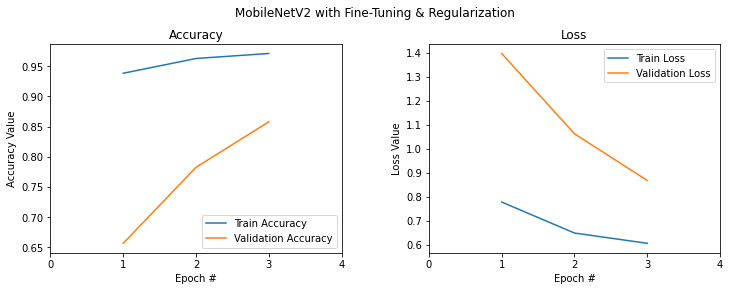

In [21]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('MobileNetV2 with Fine-Tuning & Regularization', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,4))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 8, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
ax1.set_xlim(left=0,right=4)
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 12, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
ax2.set_xlim(left=0,right=4)
l2 = ax2.legend(loc="best")